In [2]:
import networkx as nx
from collections import defaultdict

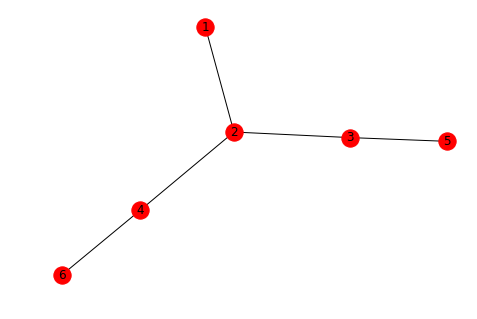

In [17]:
# small graphs for testing
G1_elist = [(1,2), (1,3), (2,4), (3,4), (1,4)]
# G1 looks like
# o-o
# |\|
# o-o

G2_elist = [(1,2), (2,3), (2,4), (3,5), (4,6)]
#   o
#   |
#   o
#  / \
# o   o
# |   |
# o   o

G1 = nx.Graph()
G1.add_edges_from(G1_elist)
G2 = nx.Graph()
G2.add_edges_from(G2_elist)
G3 = nx.complete_graph(5)
nx.draw(G2, with_labels=True)

In [7]:
# vertices w more than n*DENSE_THRESHOLD neighbors is considered dense
DENSE_THRESHOLD = 0.75
SPARSE_THRESHOLD = 0.25

In [27]:
def starting_point(G):
    result = []
    # (node, degree) pairs
    all_degrees = G.degree(G.nodes)
    
    # maps from degree to list of nodes w that degree
    deg_to_nodes = defaultdict(list)
    for node, deg in all_degrees:
        deg_to_nodes[deg].append(node)
        
    max_deg = max(deg_to_nodes)
    min_deg = min(deg_to_nodes)
    
    # include dense nodes
    if max_deg >= (len(G) * DENSE_THRESHOLD):
        result.append(deg_to_nodes[max_deg][0])  # could optimize this more
    
    # include sparse nodes
    if min_deg <= (len(G) * SPARSE_THRESHOLD):
        if min_deg == 1:
            leaf = deg_to_nodes[min_deg][0] # could optimize this more
            leaf_neighbor = list(G[leaf])[0] 
            result.append(leaf_neighbor)  
        else:
            result.append(deg_to_nodes[min_deg][0])
    return result

In [28]:
s = starting_point(G2)
s

[2]